## Previsão de aluguel de bicicletas com regressao linear simples em Python
### com Pandas, Matplotlib, Seaborn, Numpy e Sklearn
###### 17/05/2022

In [187]:
# importação das bibliotecas que vão ser utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [188]:
# carga do arquivo para um DataFrame Pandas
# um DataFrame Pandas é uma matriz bidimensional, como o excel, linhas e colunas
bike = pd.read_csv('bike.csv')

In [189]:
# Exibe o conteúdo do DataFrame
bike

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [190]:
# Cria um novo DataFrame chamado "y", que contém os valores da coluna "rental", que é o Target do modelo, ou seja, o valor a ser previsto
y = bike.rentals

In [193]:
# Matriz de Correlação, serve para mostrar a correlação entre as colunas do DataFrame, com o objetivo de selecionar as features mais relevantes ao modelo
# o método corr() utiliza o método Pearson para calcular o coeficiente de correlação. Podemos também utilizar outros métodos como o Kendall e o spearman para calcular o coeficiente de correlação, especificando o valor do parâmetro method no método corr.
bike_corr = bike.corr(method='spearman')

In [194]:
bike_corr

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
day,1.000000,0.009121,0.002063,-0.000757,-0.010620,-0.000354,0.009801,-0.029098,0.020269,0.014236,0.039647,0.018756,-0.006466
mnth,0.009121,1.000000,-0.001789,0.831526,0.019414,0.009452,-0.006010,0.031328,0.208252,0.208849,0.213206,-0.206889,0.185358
year,0.002063,-0.001789,1.000000,-0.001841,0.007954,-0.005463,-0.002013,-0.037693,0.043856,0.043356,-0.112391,-0.032031,0.255056
season,-0.000757,0.831526,-0.001841,1.000000,-0.010502,-0.003040,0.012457,0.005985,0.330662,0.329080,0.194905,-0.217014,0.291331
holiday,-0.010620,0.019414,0.007954,-0.010502,1.000000,-0.101832,-0.253023,-0.031564,-0.027147,-0.028428,-0.013758,0.020084,0.040924
weekday,-0.000354,0.009452,-0.005463,-0.003040,-0.101832,1.000000,0.036587,0.030498,-0.003737,-0.013212,-0.053604,0.012720,0.040181
workingday,0.009801,-0.006010,-0.002013,0.012457,-0.253023,0.036587,1.000000,0.060665,0.052457,0.048978,0.028181,-0.026347,-0.414774
weathersit,-0.029098,0.031328,-0.037693,0.005985,-0.031564,0.030498,0.060665,1.000000,-0.123110,-0.127264,0.596532,0.016725,-0.284265
temp,0.020269,0.208252,0.043856,0.330662,-0.027147,-0.003737,0.052457,-0.123110,1.000000,0.992554,0.129903,-0.147153,0.667427
atemp,0.014236,0.208849,0.043356,0.329080,-0.028428,-0.013212,0.048978,-0.127264,0.992554,1.000000,0.139648,-0.168987,0.667679


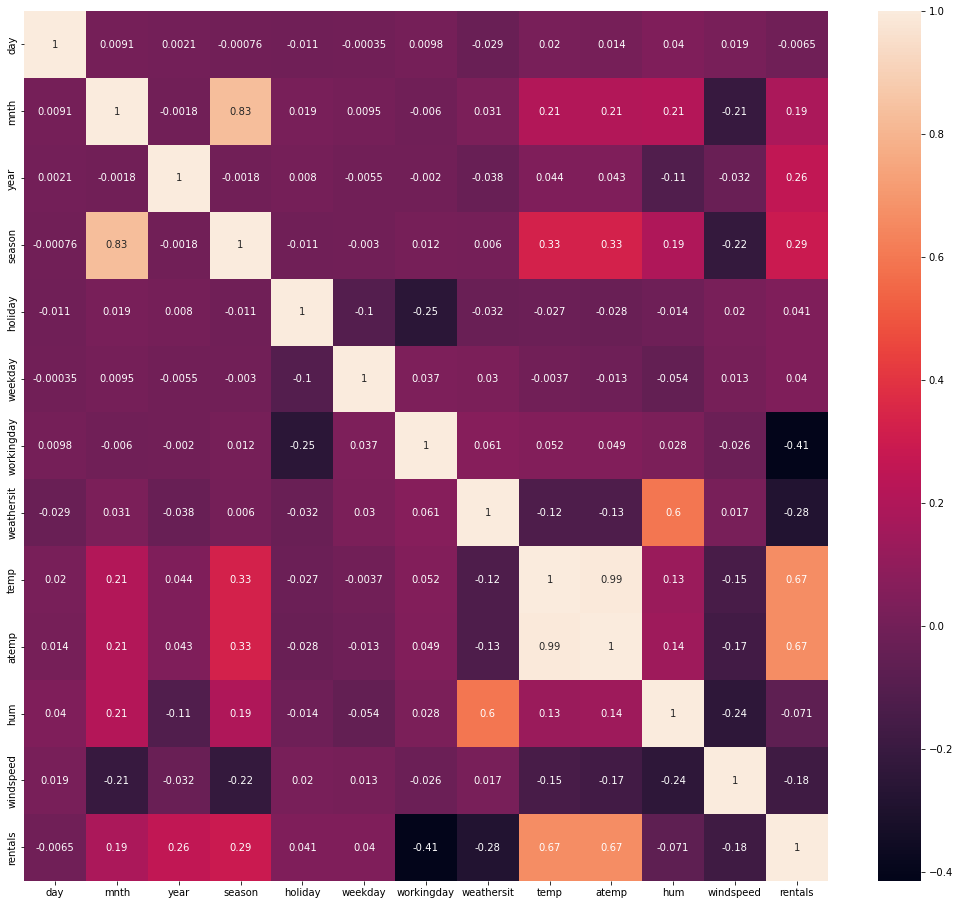

In [195]:
plt.figure(figsize=(18, 16))
sns.heatmap(bike_corr, annot=True)
plt.show()

In [191]:
# Cria um novo DataFrame chamado "X", que são as colunas Features, ou seja, as colunas selecionadas relevantes ao aprendizado do modelo

#features = ['mnth','year','temp','atemp']
#features = ['day','mnth','year','season','holiday','weekday','workingday','temp','atemp']
features = ['day','mnth','year','season','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = bike[features]

In [192]:
# Exibe a descrição estatística das features, onde tiramos vários insights
X.describe()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.738714,6.519836,2011.500684,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486
std,8.809949,3.451913,0.500342,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392
25%,8.000000,4.000000,2011.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950
50%,16.000000,7.000000,2012.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975
75%,23.000000,10.000000,2012.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214
max,31.000000,12.000000,2012.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463


In [196]:
# Separar os dados de treino e de teste
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.25, test_size = 0.75, random_state = 100)
modelo = LinearRegression()

In [197]:
# imprimindo as quantidades
print(test_y.size)
print(test_X.size)
print(train_y.size)
print(train_X.size)

549
6588
182
2184


In [198]:
# Treinando o modelo
modelo.fit(train_X, train_y)

LinearRegression()

In [199]:
# Testando o modelo
print(modelo.score(test_X, test_y))

0.6595508182321386


In [213]:
# Gerando previsão com o modelo atual

# 'day','mnth','year','season','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'
x = [[1,12,2012,1,0,4,1,1,0.38,0.38,0.6,0.2]]
prev = modelo.predict(x)
prev

array([474.57537412])